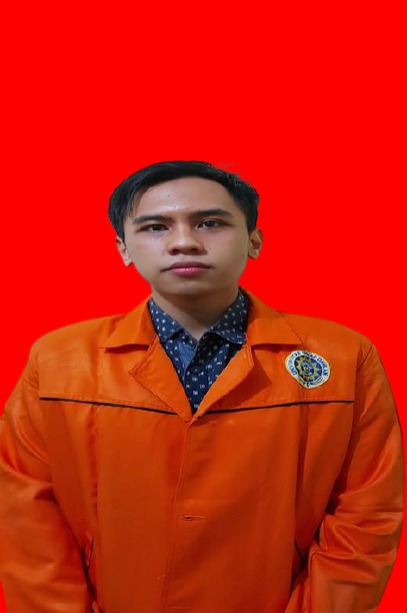

In [17]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

img = 'mujahid islami primaldi_1700018111.jpg'
dp.Image(filename=img) 

In [18]:
source_img = imageio.imread(img)

In [19]:
import numpy as np

def grayscaleimg(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

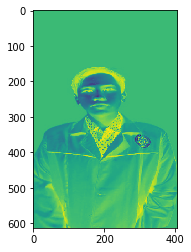

In [20]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

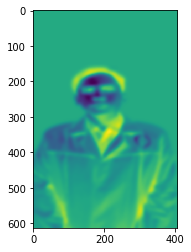

In [21]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [22]:
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [23]:
target_img= dodging(blurred_img, gryscl_img)

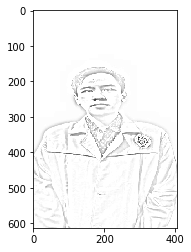

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [25]:
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)